In [194]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def minimum_image(r, L):
    """
    required for: displacement_table(), advance()
    args:
        r: array of any shape
        L: side length of cubic box
    returns:
        array of the same shape as r,
        the minimum image of r
    """
    return r - L*np.round(r / L)

def displacement_table(coordinates, L):
    """
    required for: force(), advance()

    args:
        coordinates (array): coordinates of particles,
        assumed to have shape (N, 3)
        e.g. coordinates[3,0] should give the x component
        of particle 3
        L (float): side length of cubic box,
        must be known in order to compute minimum image
    returns:
        array: table of displacements r
        such that r[i,j] is the minimum image of
        coordinates[i] - coordinates[j]
    """
    table = coordinates[:,np.newaxis,:] - coordinates[np.newaxis,:,:]
    return minimum_image(table, L)


def potential(r, L, pot, rc):
    rij = np.linalg.norm(displacement_table(r,L), axis=-1)
    A = rij < rc
    return pot*(A.sum() - np.diag(A).sum())/2


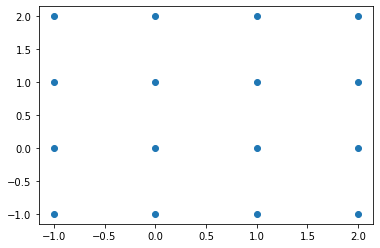

In [195]:
L = 4.0
N =4
r = np.zeros((N*N,2))
for i in range(N):
    for j in range(N):
        r[i*N+j,0] = i*L/N 
        r[i*N+j,1] = j*L/N
r = minimum_image(r, L)
plt.scatter(r[:,0], r[:,1])

Should be zero

In [196]:
potential(r, L, 1.0, 0.5)

0.0

Should be 4*4*4/2=32

In [198]:
potential(r, L, 1.0, 1.2)

32.0

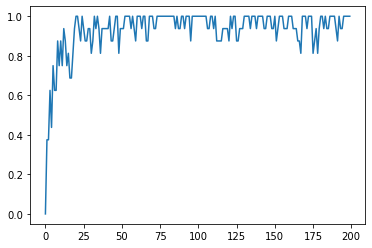

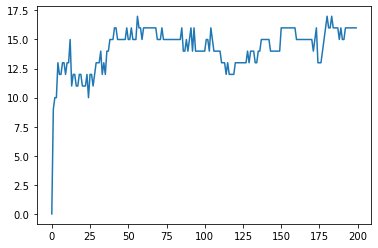

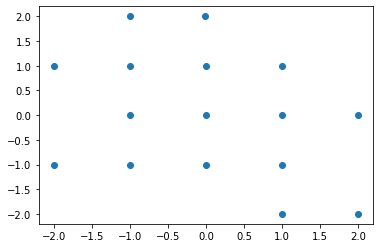

In [200]:
def run_mc(r, beta = 1,
        rc = 1.0,
        pot = 1.0,
        nsweeps = 200,
        step =.0005,):
    oldpot = potential(r, L, pot, rc)
    r = minimum_image(r,L)
    acceptances =[]
    potentials = []
    for sweep in range(nsweeps):
        naccept = 0
        for i in range(r.shape[0]):
            newr = r.copy()
            newr[i,:] += step*(np.random.random(2)-0.5)*2.0
            newr = minimum_image(newr, L)
            newpot = potential(newr, L, pot, rc)
            boltz = np.exp(-beta*(newpot-oldpot))
            u = np.random.random()
            if u < boltz:
                oldpot=newpot
                r[i,:] = newr[i,:].copy()
                naccept+=1
        acceptances.append(naccept/r.shape[0])
        potentials.append(oldpot)
    return acceptances, potentials, r

acceptances, potentials, rnew = run_mc(r)
plt.plot(acceptances)
plt.figure()
plt.plot(potentials)
plt.figure()
plt.scatter(rnew[:,0], rnew[:,1])

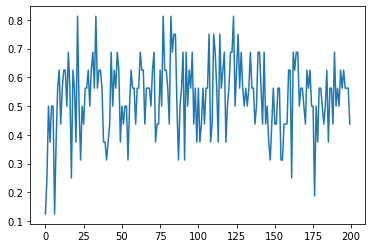

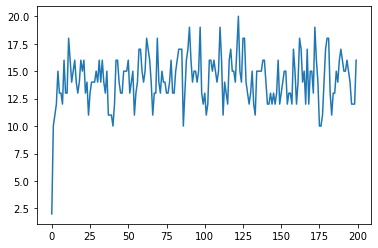

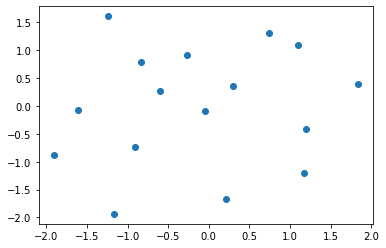

In [201]:
acceptances, potentials, rnew = run_mc(r, beta=1, rc=1.0, step=1.0)
plt.plot(acceptances)
plt.figure()
plt.plot(potentials)
plt.figure()
plt.scatter(rnew[:,0], rnew[:,1])

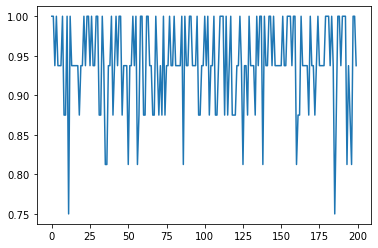

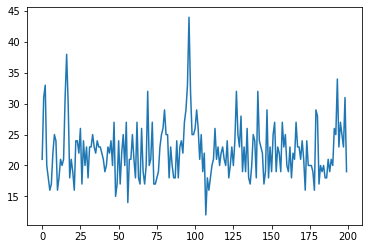

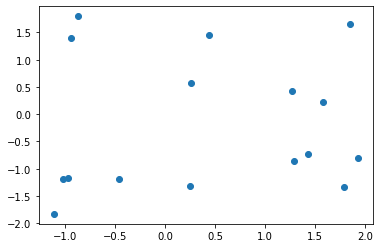

In [202]:
acceptances, potentials, rnew = run_mc(r, beta=.1, rc=1.0, step=1.0)
plt.plot(acceptances)
plt.figure()
plt.plot(potentials)
plt.figure()
plt.scatter(rnew[:,0], rnew[:,1])

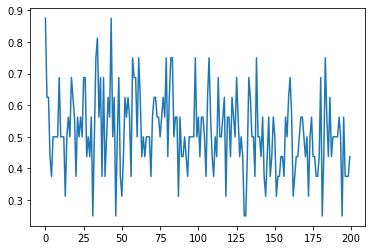

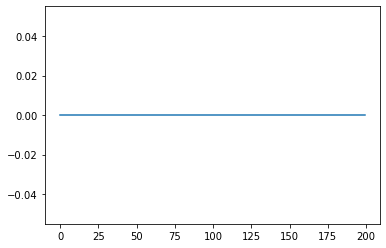

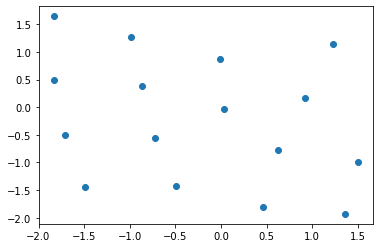

In [210]:
acceptances, potentials, rnew = run_mc(r, beta=10, rc=.9, step=.1)
plt.plot(acceptances)
plt.figure()
plt.plot(potentials)
plt.figure()
plt.scatter(rnew[:,0], rnew[:,1])